In [1]:
import sys
sys.path.append("../")
from plotting import CandlePlot
import pandas as pd

In [2]:
from technicals.patterns import apply_patterns

In [3]:
df = pd.read_pickle("../data/GBP_JPY_H1.pkl")

In [4]:
df_an = df[['time', 'mid_c', 'mid_o', 'mid_h', 'mid_l']].copy()

In [5]:
df_an.tail()

,time,mid_c,mid_o,mid_h,mid_l
3996,2024-06-14 16:00:00+00:00,199.580,199.472,199.634,199.382
3997,2024-06-14 17:00:00+00:00,199.550,199.581,199.671,199.463
3998,2024-06-14 18:00:00+00:00,199.444,199.550,199.572,199.435
3999,2024-06-14 19:00:00+00:00,199.621,199.444,199.622,199.443
4000,2024-06-14 20:00:00+00:00,199.684,199.620,199.724,199.562


In [6]:
df_an= apply_patterns(df_an)

In [7]:
df_an.tail()

,time,mid_c,mid_o,mid_h,mid_l,body_lower,body_upper,body_bottom_perc,body_top_perc,body_perc,...,body_perc_prev_2,HANGING_MAN,SHOOTING_STAR,SPINNING_TOP,MARUBOZU,ENGULFING,TWEEZER_TOP,TWEEZER_BOTTOM,MORNING_STAR,EVENING_STAR
3996,2024-06-14 16:00:00+00:00,199.580,199.472,199.634,199.382,199.472,199.580,35.714286,78.571429,42.857143,...,32.263815,False,False,False,False,False,False,False,False,False
3997,2024-06-14 17:00:00+00:00,199.550,199.581,199.671,199.463,199.550,199.581,41.826923,56.730769,14.903846,...,39.634146,False,False,True,False,False,False,False,False,False
3998,2024-06-14 18:00:00+00:00,199.444,199.550,199.572,199.435,199.444,199.550,6.569343,83.941606,77.372263,...,42.857143,False,False,False,False,False,False,False,False,False
3999,2024-06-14 19:00:00+00:00,199.621,199.444,199.622,199.443,199.444,199.621,0.558659,99.441341,98.882682,...,14.903846,False,False,False,True,True,False,False,False,False
4000,2024-06-14 20:00:00+00:00,199.684,199.620,199.724,199.562,199.620,199.684,35.802469,75.308642,39.506173,...,77.372263,False,False,False,False,False,False,False,False,False


In [8]:
import plotly.graph_objects as go

In [10]:
df_an[df_an.MARUBOZU==True]

,time,mid_c,mid_o,mid_h,mid_l,body_lower,body_upper,body_bottom_perc,body_top_perc,body_perc,...,body_perc_prev_2,HANGING_MAN,SHOOTING_STAR,SPINNING_TOP,MARUBOZU,ENGULFING,TWEEZER_TOP,TWEEZER_BOTTOM,MORNING_STAR,EVENING_STAR
524,2023-11-22 23:00:00+00:00,186.669,186.836,186.836,186.668,186.669,186.836,0.595238,100.000000,99.404762,...,80.165289,False,False,False,True,True,False,False,False,False
548,2023-11-23 23:00:00+00:00,187.546,187.349,187.548,187.349,187.349,187.546,0.000000,98.994975,98.994975,...,28.169014,False,False,False,True,True,False,False,False,False
552,2023-11-24 03:00:00+00:00,187.418,187.301,187.418,187.301,187.301,187.418,0.000000,100.000000,100.000000,...,48.717949,False,False,False,True,True,False,False,False,False
836,2023-12-11 23:00:00+00:00,183.346,183.528,183.528,183.346,183.346,183.528,0.000000,100.000000,100.000000,...,45.255474,False,False,False,True,True,False,False,False,False
964,2023-12-19 07:00:00+00:00,182.625,181.832,182.638,181.829,181.832,182.625,0.370828,98.393078,98.022250,...,18.584071,False,False,False,True,False,False,False,False,False
1726,2024-02-05 01:00:00+00:00,187.124,187.493,187.495,187.120,187.124,187.493,1.066667,99.466667,98.400000,...,43.648208,False,False,False,True,True,False,False,False,False
2182,2024-03-01 01:00:00+00:00,189.968,189.670,189.972,189.670,189.670,189.968,0.000000,98.675497,98.675497,...,52.416357,False,False,False,True,False,False,False,False,False
2261,2024-03-06 08:00:00+00:00,190.565,190.064,190.568,190.064,190.064,190.565,0.000000,99.404762,99.404762,...,57.031250,False,False,False,True,True,False,False,False,False
2352,2024-03-12 02:00:00+00:00,189.014,188.388,189.015,188.378,188.388,189.014,1.569859,99.843014,98.273155,...,50.877193,False,False,False,True,False,False,False,False,False
2497,2024-03-20 03:00:00+00:00,192.531,192.377,192.531,192.374,192.377,192.531,1.910828,100.000000,98.089172,...,5.384615,False,False,False,True,False,False,False,False,False


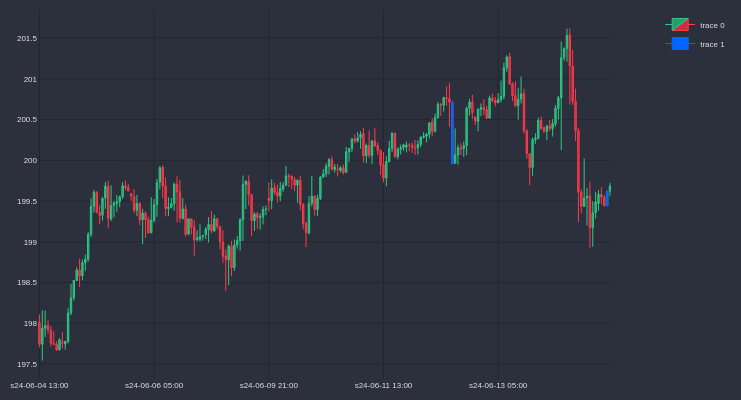

In [11]:
MARKER = '#0066FF'
dfp= df_an.iloc[-200:]
cp= CandlePlot(dfp, candles=True)
df_temp= cp.df_plot[cp.df_plot.MARUBOZU==True]
cp.fig.add_trace(go.Candlestick(
    x=df_temp.sTime,
    open= df_temp.mid_o,
    high= df_temp.mid_h,
    low= df_temp.mid_l,
    close= df_temp.mid_c,
    line=dict(width=1), opacity=1,
    increasing_fillcolor=MARKER,
    decreasing_fillcolor=MARKER,
    increasing_line_color=MARKER,
    decreasing_line_color=MARKER

    ))
        

cp.show_plot()